# Visualization of point clouds


In [1]:
# Initialize data
import dataset_parser
path = '/home/alba/Sources/coding_test/NotreDame'
bundle = dataset_parser.Bundler(path)

In [20]:
import utils.epipolar_geometry
import numpy as np

im0, im1 = 1, 2

p0, p1 = bundle.get_corres(im0, im1)
p0d, p1d = bundle.get_corres(im0, im1, undistorted=False)
p0h = np.concatenate((p0, np.ones((len(p0), 1))), axis=1)
p1h = np.concatenate((p1, np.ones((len(p1), 1))), axis=1)

P0 = bundle.get_camera_matrix(im0)
P1 = bundle.get_camera_matrix(im1)
P0[:,3]

points = []
for p, q in zip(p0h, p1h):
    points.append(utils.epipolar_geometry.triangulate(p, q, P0, P1))
points = np.array(points)

In [18]:
import numpy as np
import open3d as o3d
from open3d import JVisualizer

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
visualizer = JVisualizer()
visualizer.add_geometry(pcd)
visualizer.show()


JVisualizer with 1 geometries

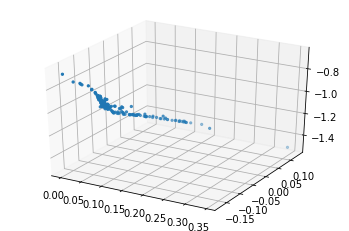

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:,1], points[:,2],marker='.')

In [ ]:
bundle.get_intrinsics(1).shape
b = bundle.get_extrinsics(1)

b[:-1, :]
